# College Basketball Tournament Championship Probabilities

In [2]:
import pandas as pd
import numpy as np
from plotnine import ggplot
import random
from random import sample
import seaborn as sns
from plotnine import ggplot
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from plotnine import *
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from statistics import mean

random.seed(123)

In [3]:
def match_team_name(x):
    if (x == "NORTH CAROLINA ST.") | (x == "NO. CAROLINA ST."):
        return("N.C. STATE")
    elif  (x == "BOSTON UNIVERSITY") |  (x == "BOSTON U.") |  (x == "BOSTON UNIV"):
        return("BOSTON")
    elif (x == "LIU") | (x == "LONG ISLAND UNIVERSITY") | (x == "LONG ISLAND UNIVER") | (x == "LONG ISLAND U."):
        return("LIU BROOKLYN")
    elif (x == "ARKANSAS PINE BLUFF") | (x == "ARKANSAS-PINE BLUFF") | (x == "ARK.-PINE BLUFF"):
        return("ARKANSAS PINE-BLUFF")
    elif (x == "NORTHERN COLORADO"):
        return("NORTH COLORADO")
    elif (x == "GARDNER WEBB"):
        return("GARDNER-WEBB")
    elif (x == "SOUTHEASTERN LOUISIANA"):
        return("SOUTHEAST LOUISIANA")
    elif (x == "KENT"):
        return("KENT ST.")
    elif (x == "NORTH CAROLINA WILMINGTON") | (x == "NC WILMINGTON"):
        return("UNC WILMINGTON")
    elif (x == "NORTH CAROLINA CHARLOTTE"):
        return("CHARLOTTE")
    elif (x == "SOUTHERN CAL"):
        return("USC")
    elif (x == "PENNSYLVANIA"):
        return("PENN")
    elif (x == "CENTRAL CONNECTICUT ST.") | (x == "CENT. CONNECTICUT") | (x == "CENTRAL CONNECTICUTT ST.") | (x == "CENTRAL CONN. ST."):
        return("CENTRAL CONNECTICUT")
    elif (x == "MIAMI FLORIDA"):
        return("MIAMI FL")
    elif (x == "CALIFORNIA SANTA BARBARA"):
        return("UC SANTA BARBARA")
    elif (x == "WISCONSIN MILWAUKEE") | (x == "WIS.-MILWAUKEE"):
        return("MILWAUKEE")
    elif (x == "NORTH CAROLINA ASHEVILLE") | (x == "NC ASHEVILLE"):
        return("UNC ASHEVILLE")
    elif (x == "ST. JOSEPH'S PA.") | (x == "SAINT JOSEPH'S PA"):
        return("SAINT JOSEPH'S")
    elif (x == "ALABAMA BIRMINGHAM"):
        return("UAB")
    elif (x == "CENTRAL FLORIDA") | (x == "UCF(CENTRAL FLORID") | (x == "UCF(CENTRAL FLORI"):
        return("UCF")
    elif (x == "MONMOUTH NJ") | (x == "MONMOUTH-NJ"):
        return("MONMOUTH")
    elif (x == "TEXAS SAN ANTONIO") | (x == "TEXAS-SAN ANTONIO") | (x == "TEXAS-SAN ANTONIO(UTSA)"):
        return("UTSA")
    elif (x == "TEXAS EL PASO"):
        return("UTEP")
    elif (x == "LOUISIANA-LAFAYETTE") | (x == "LOUISIANA"):
        return("LOUISIANA LAFAYETTE")
    elif (x == "ST. MARY'S CA."):
        return("SAINT MARY'S")
    elif (x == "SE LOUISIANA"):
        return("SOUTHEAST LOUISIANA")
    elif (x == "TENNESSEE CHATTANOOGA"):
        return("CHATTANOOGA")
    elif (x == "OHIO UNIVERSITY") | (x == "OHIO U."):
        return("OHIO")
    elif (x == "MIAMI OHIO"):
        return("MIAMI OH")
    elif (x == "TEXAS A&M-CORPUS CHRISTI") | (x == "TEXAS A&M-CORPUS C") | (x == "TEXAS A&M CORPUS CHRISRISTI") | (x == "TEXAS A&M CORPUSCH"):
        return("TEXAS A&M CORPUS CHRIS")
    elif (x == "NEVADA LAS VEGAS"):
        return("UNLV")
    elif (x == "MT. ST. MARY'S MD."):
        return("MOUNT ST. MARY'S")
    elif (x == "CAL STATE FULLERTON") | (x == "CS FULLERTON"):
        return("CAL ST. FULLERTON")
    elif (x == "MARYLAND BALTIMORE COUNTY") | (x == "UMBC (MD-BALT)") | (x == "UMBC(MD-BALT)"):
        return("UMBC")
    elif (x == "CAL STATE NORTHRIDGE") | (x == "CS NORTHRIDGE"):
        return("CAL ST. NORTHRIDGE")
    elif (x == "S. F. AUSTIN"):
        return("STEPHEN F. AUSTIN")
    elif (x == "OAKLAND MI"):
        return("OAKLAND")
    elif (x == "ST. PETER'S"):
        return("SAINT PETER'S")
    elif (x == "ST. LOUIS"):
        return("SAINT LOUIS")
    elif (x == "SOUTHERN MISSISSIPPI"):
        return("SOUTHERN MISS")
    elif (x == "LOYOLA MARYLAND") | (x == "LOYOLA-MARYLAND"):
        return("LOYOLA MD")
    elif (x == "MIDDLE TENNESSEE ST."):
        return("MIDDLE TENNESSEE")
    elif (x == "CALIFORNIA IRVINE"):
        return("UC IRVINE")
    elif (x == "CAL STATE BAKERSFIELD") | (x == "CS BAKERSFIELD"):
        return("CAL ST. BAKERSFIELD")
    elif (x == "WISCONSIN GREEN BAY"):
        return("GREEN BAY")
    elif (x == "CALIFORNIA DAVIS"):
        return("UC DAVIS")
    elif (x == "LOYOLA ILLINOIS") | (x == "LOYOLA-CHICAGO"):
        return("LOYOLA CHICAGO")
    elif (x == "NORTH CAROLINA GREENSBORO") | (x == "NC GREENSBORO"):
        return("UNC GREENSBORO")
    elif (x == "PRAIRIE VIEW"):
        return("PRAIRIE VIEW A&M")
    elif (x == "TROY ST."):
        return("TROY")
    elif (x == "XAVIER-OHIO"):
        return("XAVIER")
    elif (x == "ILLINOIS-CHICAGO") | (x == "IL CHICAGO"):
        return("ILLINOIS CHICAGO")
    elif (x == "SC ST.") | (x == "SO. CAROLINA ST."):
        return("SOUTH CAROLINA ST.")
    elif (x == "VA. COMMONWEALTH"):
        return("VCU")
    elif (x == "SOUTHERN U."):
        return("SOUTHERN")
    elif (x == "ALBANY-NY"):
        return("ALBANY")
    elif (x == "AMERICAN U.") | (x == "AMERICAN UNIVERSIT"):
        return("AMERICAN")
    elif (x == "MISS. VALLEY ST.") | (x == "MVSU (MISS. VALLEY") | (x =="MISSISSIPPI VALLEY"):
        return("MISSISSIPPI VALLEY ST.")
    elif (x == "BINGHAMTON-NY   (N") | (x == "BINGHAMTON-NY"):
        return("BINGHAMTON")
    elif (x == "EAST TENNESSEE STATE") | (x == "EAST TENNESSEE ST.(ETS"):
        return("EAST TENNESSEE ST.")
    elif (x == "ARK.-LITTLE ROCK") | (x == "ARK.-LITTLE ROCK(UALR)") | (x == "LITTLE ROCK"):
        return("ARKANSAS LITTLE ROCK")
    elif (x == "N.C. A&T") | (x == "NC A&T"):
        return("NORTH CAROLINA A&T")
    elif (x == "NC CENTRAL"):
        return("NORTH CAROLINA CENTRAL")
    elif (x == "HAWAI'I"):
        return("HAWAII")
    elif (x == "STONY BROOK-NY"):
        return("STONY BROOK")
    elif (x == "FL ATLANTIC"):
        return("FLORIDA ATLANTIC")
    elif (x == "ST JOHN'S"):
        return("ST. JOHN'S")
    elif (x == "MURRAY ST"):
        return("MURRAY ST.")
    elif (x == "C MICHIGAN"):
        return("CENTRAL MICHIGAN")
    elif (x == "F DICKINSON"):
        return("FAIRLEIGH DICKINSON")
    elif (x == "N KENTUCKY"):
        return("NORTHERN KENTUCKY")
    elif (x == "SOUTHWEST MISSOURI ST."):
        return("MISSOURI ST.")
    elif (x == "TEXAS PAN AMERICAN"):
        return("UT RIO GRANDE VALLEY")
    elif (x == "SOUTHWEST TEXAS ST."):
        return("TEXAS ST.")
    elif (x == "FORT WAYNE") | (x == "PURDUE FORT WAYNE"):
        return("IPFW")
    elif (x == "UTAH VALLEY"):
        return("UTAH VALLEY ST.")
    elif (x == "CHARLESTON"):
        return("COLLEGE OF CHARLESTON")
    elif (x == "DETROIT MERCY"):
        return("DETROIT")
    else:
        return (x)

In [4]:
smoore = pd.DataFrame()
for yr in range(2002, 2023, 1):
    if yr != 2020:
        new_row = pd.read_excel("Sonny Moore Rankings.xlsx", sheet_name=str(yr))
        if any([col.startswith("Unnamed") for col in new_row.columns]):
            for row in new_row.iterrows():
                if not any(pd.isnull(row[1])):
                    cols = row[0]
                    break
            new_row.set_axis(new_row.iloc[cols], axis=1,inplace=True)
            new_row = new_row.loc[new_row[new_row.columns[0]] != new_row.columns[0]].dropna(axis=0)
        new_row["Season"] = yr
        smoore = pd.concat([smoore, new_row], axis=0)
        del new_row
smoore.set_axis([col.replace(" ", ".") for col in smoore.columns], axis=1,inplace=True)

In [5]:
sagarin = pd.DataFrame()
for yr in range(2002, 2023, 1):
    if yr != 2020:
        new_row = pd.read_excel("Sagarin Ratings.xlsx", sheet_name=str(yr))
        new_row["Season"] = yr
        sagarin = pd.concat([sagarin, new_row], axis=0)
        del new_row
sagarin.set_axis([col.replace(" ", ".") for col in sagarin.columns], axis=1,inplace=True)

In [6]:
kenpom = pd.DataFrame()
for yr in range(2002, 2023, 1):
    if yr != 2020:
        short_yr = str(yr)[2:4]
        new_row = pd.read_csv(f"summary{short_yr}_pt.csv")
        kenpom = pd.concat([kenpom, new_row], axis=0)
        del new_row

In [7]:
massey = pd.DataFrame()
for yr in range(2002, 2023, 1):
    if yr != 2020:
        new_row = pd.read_excel("Massey Ratings.xls", sheet_name=str(yr))
        new_row["Season"] = yr
        massey = pd.concat([massey, new_row], axis=0)
        del new_row
massey.set_axis([col.replace(" ", ".") for col in massey.columns], axis=1,inplace=True)
massey.set_axis([col.replace("%", "Pct") for col in massey.columns], axis=1,inplace=True)
massey.set_axis([col.replace("&", "") for col in massey.columns], axis=1,inplace=True)
massey.set_axis([col.replace(";", "") for col in massey.columns], axis=1,inplace=True)

In [8]:
results = pd.DataFrame()
for yr in range(2002, 2023, 1):
    if yr != 2020:
        new_row = pd.read_excel("Binary Tourney Results.xlsx", sheet_name=str(yr))
        new_row["Season"] = yr
        results = pd.concat([results, new_row], axis=0)
        del new_row
results.set_axis([col.replace(" ", ".") for col in results.columns], axis=1,inplace=True)

In [9]:
kenpom = pd.DataFrame()
for yr in range(2002, 2023, 1):
    if yr != 2020:
        short_yr = str(yr)[2:4]
        new_row = pd.read_csv(f"summary{short_yr}_pt.csv")
        kenpom = pd.concat([kenpom, new_row], axis=0)
        del new_row

In [10]:
results["Team"] = results.Team.str.upper()
kenpom["TeamName"] = kenpom.TeamName.str.upper().apply(match_team_name)
massey["Team"] = massey.Team.str.upper().apply(match_team_name)
sagarin["Team"] = sagarin.Team.str.upper().apply(match_team_name)
smoore["Team"] = smoore.Team.str.upper().apply(match_team_name)

In [11]:
full_data = kenpom.merge(results, how="left", left_on=["Season", "TeamName"], right_on=["Season", "Team"]).merge(massey, left_on=["Season", "TeamName"], right_on=["Season", "Team"], suffixes=('', '.mass')).merge(sagarin, left_on=["Season", "TeamName"], right_on=["Season", "Team"], suffixes=('', '.sag')).merge(smoore, left_on=["Season", "TeamName"], right_on=["Season", "Team"], suffixes=('', '.moore'))
full_data[['Round.of.32', 'Round.of.16', 'Round.of.8', 'Round.of.4', 'Championship', 'Champion', 'Made.Tournament']] = full_data[['Round.of.32', 'Round.of.16', 'Round.of.8', 'Round.of.4', 'Championship', 'Champion', 'Made.Tournament']].fillna(0)
full_data = full_data.astype({'Golden.Mean':'string'})
full_data = full_data.astype({'Elo.Chess':'string'})
full_data = full_data.astype({'Recent':'string'})
full_data['Golden.Mean'] = full_data['Golden.Mean'].str.replace(" ", "")
full_data['Elo.Chess'] = full_data['Elo.Chess'].str.replace(" ", "")
full_data['Recent'] = full_data['Recent'].str.replace(" ", "")
full_data = full_data.astype({'Golden.Mean':'float'})
full_data = full_data.astype({'Elo.Chess':'float'})
full_data = full_data.astype({'Recent':'float'})
full_data.head()

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,...,Golden.Mean,Recent,Conference.sag,Rank.moore,Team.moore,PR,W.moore,L.moore,T,SOS.moore
0,2002,DUKE,77.0734,8,73.9016,10,116.373,1,121.374,1,...,NaN,NaN,NaN,1,DUKE,102.2,NaN,NaN,NaN,NaN
1,2002,CINCINNATI,68.4368,212,66.9485,202,112.274,10,117.448,7,...,NaN,NaN,NaN,4,CINCINNATI,93.58,NaN,NaN,NaN,NaN
2,2002,KANSAS,79.0371,5,77.6019,2,114.544,4,118.100,5,...,NaN,NaN,NaN,3,KANSAS,96.25,NaN,NaN,NaN,NaN
3,2002,MARYLAND,75.2758,20,73.3263,16,113.167,5,118.151,4,...,NaN,NaN,NaN,2,MARYLAND,98.39,NaN,NaN,NaN,NaN
4,2002,FLORIDA,71.8971,84,69.5612,95,110.418,22,115.387,16,...,NaN,NaN,NaN,8,FLORIDA,90.66,NaN,NaN,NaN,NaN


In [12]:
full_data

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,...,Golden.Mean,Recent,Conference.sag,Rank.moore,Team.moore,PR,W.moore,L.moore,T,SOS.moore
0,2002,DUKE,77.0734,8,73.9016,10,116.373,1,121.374,1,...,NaN,NaN,NaN,1,DUKE,102.2,NaN,NaN,NaN,NaN
1,2002,CINCINNATI,68.4368,212,66.9485,202,112.274,10,117.448,7,...,NaN,NaN,NaN,4,CINCINNATI,93.58,NaN,NaN,NaN,NaN
2,2002,KANSAS,79.0371,5,77.6019,2,114.544,4,118.100,5,...,NaN,NaN,NaN,3,KANSAS,96.25,NaN,NaN,NaN,NaN
3,2002,MARYLAND,75.2758,20,73.3263,16,113.167,5,118.151,4,...,NaN,NaN,NaN,2,MARYLAND,98.39,NaN,NaN,NaN,NaN
4,2002,FLORIDA,71.8971,84,69.5612,95,110.418,22,115.387,16,...,NaN,NaN,NaN,8,FLORIDA,90.66,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,2022,WRIGHT ST.,69.1928,109,68.4334,97,108.996,39,106.365,108,...,71.95,77.38,HORIZON,98.0,WRIGHT ST.,76.75,22.0,14.0,0.0,67.13
6696,2022,WYOMING,66.1084,279,66.0062,238,107.367,58,110.173,54,...,78.88,79.14,MOUNTAIN WEST,81.0,WYOMING,79.49,25.0,9.0,0.0,72.62
6697,2022,XAVIER,69.1484,111,68.1678,109,105.261,107,110.936,41,...,82.96,79.66,BIG EAST,38.0,XAVIER,83.43,21.0,13.0,0.0,77.00
6698,2022,YALE,70.2695,73,68.6807,86,101.727,182,101.474,203,...,74.94,75.19,IVY LEAGUE,157.0,YALE,72.84,19.0,12.0,0.0,69.06


I would need to separate data into train, test and holdout data. It was split up into 12 years of data to train, seven years to test, and the 2022 tournament would serve as our validation set.

In [13]:
random.seed(123)

years = [yr for yr in range(2002, 2022, 1) if yr != 2020]
random.seed(123)
train_years = sample(years, 12)
random.seed(123)
test_years = [yr for yr in years if yr not in train_years]

random.seed(123)
train = full_data.loc[full_data.Season.isin(train_years)]
random.seed(123)
test = full_data.loc[full_data.Season.isin(test_years)]
random.seed(123)
holdout = full_data.loc[full_data.Season == 2022]

In [14]:
train["Tier1.W"] = np.where(train["Season"] >= 2007, train["Top.25.W"], train["Top.10.W"])
train["Tier1.L"] = np.where(train["Season"] >= 2007, train["Top.25.L"], train["Top.10.L"])
train["Tier2.W"] = np.where(train["Season"] >= 2007, train["Top.50.W"], train["Top.30.W"])
train["Tier2.L"] = np.where(train["Season"] >= 2007, train["Top.50.L"], train["Top.30.L"])
train["Sagarin.Mean"] = np.where(train["Season"] >= 2014, train["Golden.Mean"], train["Elo.Chess"])
train["Sagarin.Recent"] = np.where(train["Season"] >= 2014, train["Recent"], train["Elo.Chess"])
train = train.dropna(axis=1)

test["Tier1.W"] = np.where(test["Season"] >= 2007, test["Top.25.W"], test["Top.10.W"])
test["Tier1.L"] = np.where(test["Season"] >= 2007, test["Top.25.L"], test["Top.10.L"])
test["Tier2.W"] = np.where(test["Season"] >= 2007, test["Top.50.W"], test["Top.30.W"])
test["Tier2.L"] = np.where(test["Season"] >= 2007, test["Top.50.L"], test["Top.30.L"])
test["Sagarin.Mean"] = np.where(test["Season"] >= 2014, test["Golden.Mean"], test["Elo.Chess"])
test["Sagarin.Recent"] = np.where(test["Season"] >= 2014, test["Recent"], test["Elo.Chess"])
test = test.dropna(axis=1)

holdout["Tier1.W"] = np.where(holdout["Season"] >= 2007, holdout["Top.25.W"], holdout["Top.10.W"])
holdout["Tier1.L"] = np.where(holdout["Season"] >= 2007, holdout["Top.25.L"], holdout["Top.10.L"])
holdout["Tier2.W"] = np.where(holdout["Season"] >= 2007, holdout["Top.50.W"], holdout["Top.30.W"])
holdout["Tier2.L"] = np.where(holdout["Season"] >= 2007, holdout["Top.50.L"], holdout["Top.30.L"])
holdout["Sagarin.Mean"] = np.where(holdout["Season"] >= 2014, holdout["Golden.Mean"], holdout["Elo.Chess"])
holdout["Sagarin.Recent"] = np.where(holdout["Season"] >= 2014, holdout["Recent"], holdout["Elo.Chess"])
holdout = holdout.dropna(axis=1)

<ipython-input-14-9e4acb274453>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-14-9e4acb274453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-14-9e4acb274453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-14-9e4acb274453>

In [15]:
train[["Tempo", "AdjTempo", "OE", "AdjOE", "DE", "AdjDE", "AdjEM",
       "Win.Pct", "Rat.Rank", "Pwr.Rank", "Off.Rank", "Def.Rank", "HFA", "SoS.Rank",
       "Rating", "SOS", "Sagarin.Mean", "Predictor", "Sagarin.Recent",
       "W", "L", "Tier1.W", "Tier1.L", "Tier2.W", "Tier2.L",
       "PR", "Rank.moore"]].isnull().groupby(train["Season"]).sum().T

Season,2002,2003,2004,2006,2007,2008,2010,2011,2012,2015,2019,2021
Tempo,0,0,0,0,0,0,0,0,0,0,0,0
AdjTempo,0,0,0,0,0,0,0,0,0,0,0,0
OE,0,0,0,0,0,0,0,0,0,0,0,0
AdjOE,0,0,0,0,0,0,0,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,0,0
AdjDE,0,0,0,0,0,0,0,0,0,0,0,0
AdjEM,0,0,0,0,0,0,0,0,0,0,0,0
Win.Pct,0,0,0,0,0,0,0,0,0,0,0,0
Rat.Rank,0,0,0,0,0,0,0,0,0,0,0,0
Pwr.Rank,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

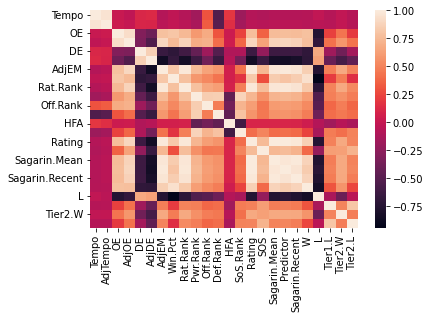

In [16]:
cor = train[["Tempo", "AdjTempo", "OE", "AdjOE", "DE", "AdjDE", "AdjEM",
       "Win.Pct", "Rat.Rank", "Pwr.Rank", "Off.Rank", "Def.Rank", "HFA", "SoS.Rank",
       "Rating", "SOS", "Sagarin.Mean", "Predictor", "Sagarin.Recent",
       "W", "L", "Tier1.W", "Tier1.L", "Tier2.W", "Tier2.L",
       "PR", "Rank.moore"]].corr(min_periods = 1)
cor = cor.fillna(0)
cor = cor.loc[(cor!=0).any(axis=0)]
cor = cor.loc[:, (cor!=0).any(axis=0)]
sns.heatmap(cor)

<AxesSubplot:>

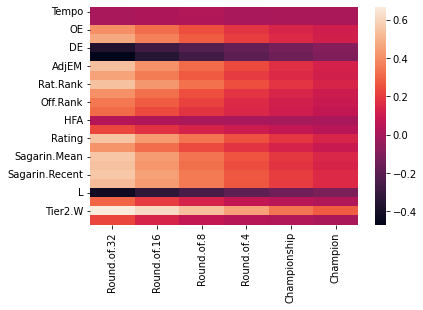

In [17]:
targets = ["Made.Tournament", "Round.of.32", "Round.of.16", "Round.of.8", "Round.of.4", "Championship", "Champion"]
cor = train[["Tempo", "AdjTempo", "OE", "AdjOE", "DE", "AdjDE", "AdjEM",
       "Win.Pct", "Rat.Rank", "Pwr.Rank", "Off.Rank", "Def.Rank", "HFA", "SoS.Rank",
       "Rating", "SOS", "Sagarin.Mean", "Predictor", "Sagarin.Recent",
       "W", "L", "Tier1.W", "Tier1.L", "Tier2.W", "Tier2.L",
       "PR", "Rank.moore"]+targets].corr(min_periods = 1)
cor = cor[targets].drop("Made.Tournament", axis=1).fillna(0)
cor = cor.loc[(cor!=0).any(axis=1)]
cor = cor.loc[~cor.index.isin(targets)]
sns.heatmap(cor)

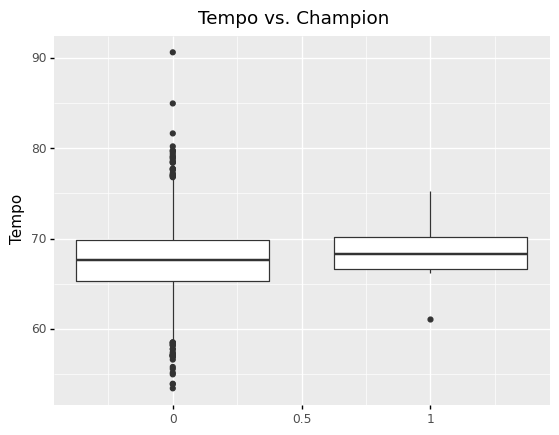

<ggplot: (8755503200711)>


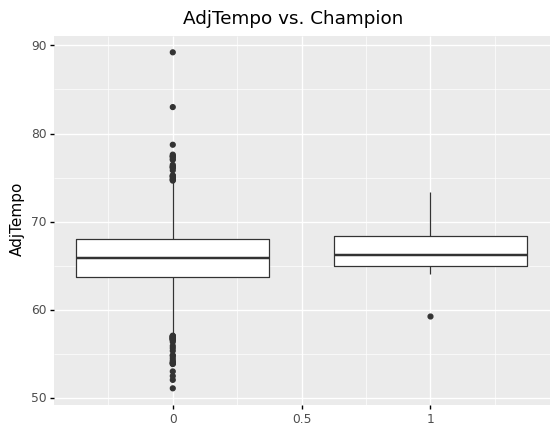

<ggplot: (8755496363469)>


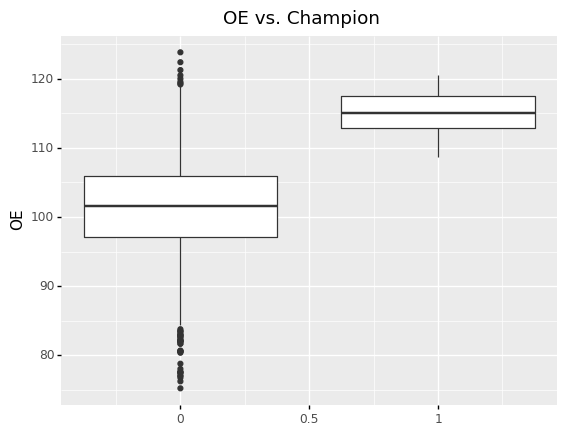

<ggplot: (8755495602601)>


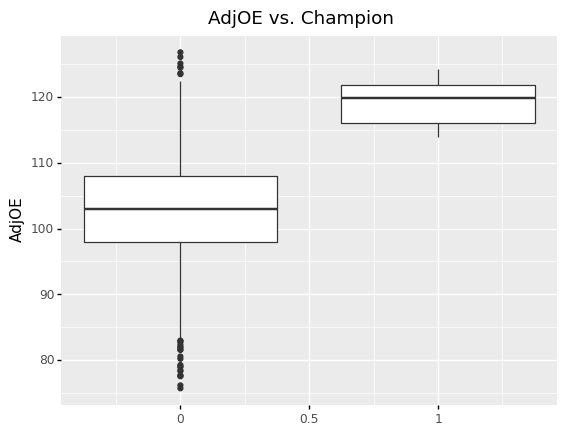

<ggplot: (8755503200753)>


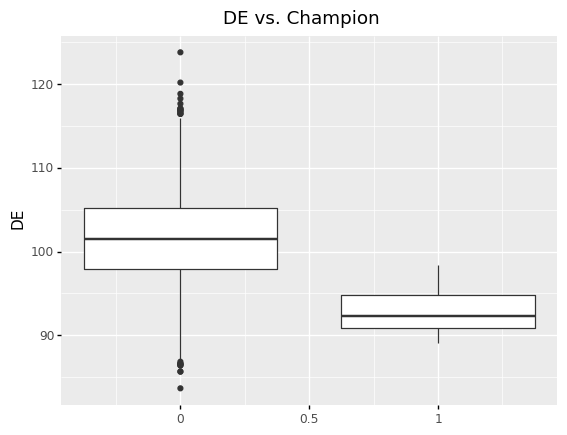

<ggplot: (8755495952993)>


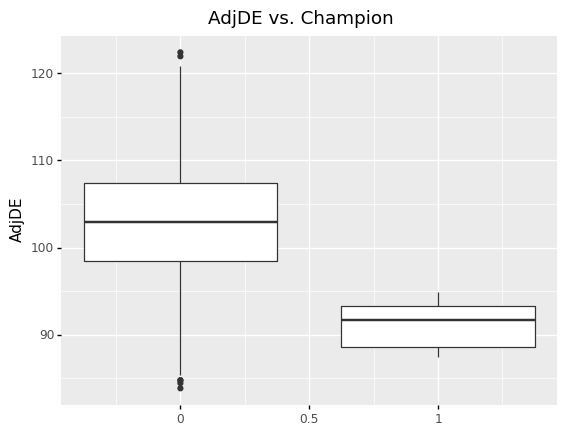

<ggplot: (8755496679765)>


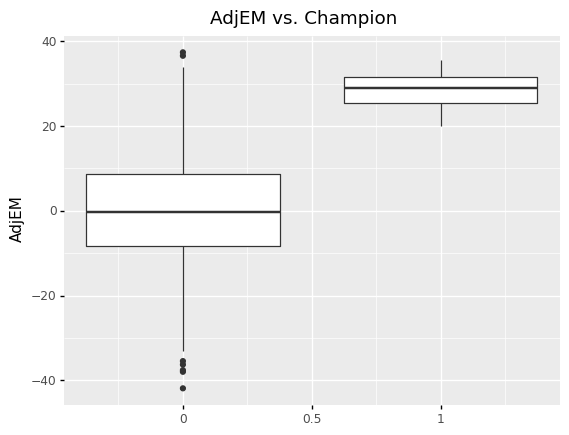

<ggplot: (8755496674829)>


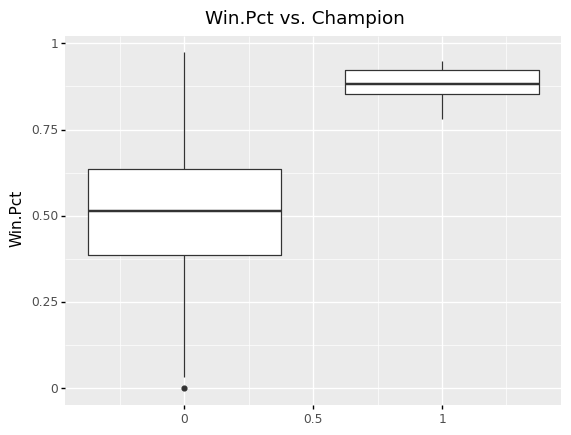

<ggplot: (8755496688159)>


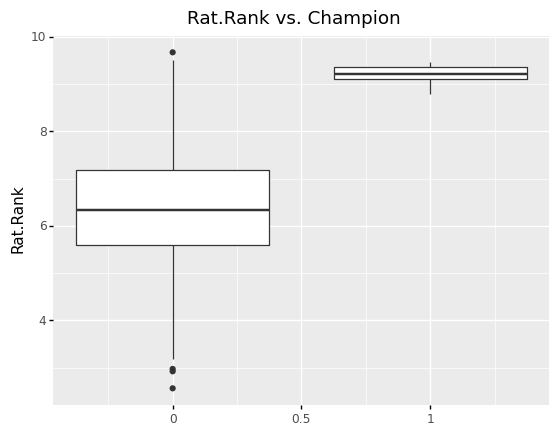

<ggplot: (8755495952875)>


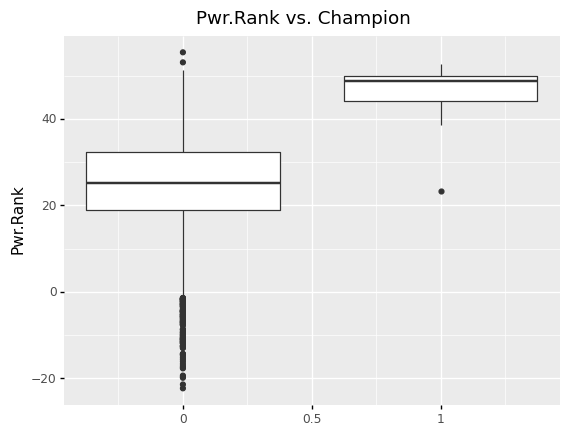

<ggplot: (8755504251938)>


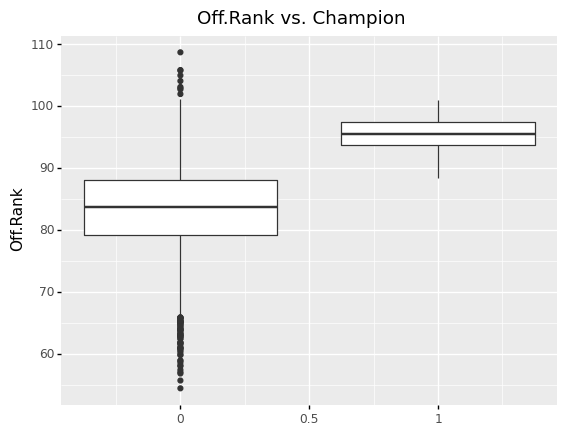

<ggplot: (8755503504366)>


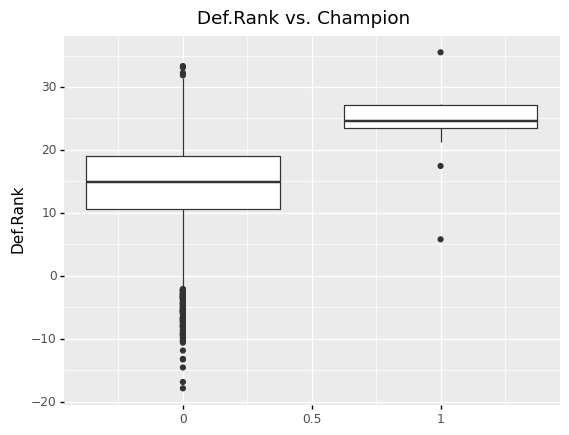

<ggplot: (8755478888626)>


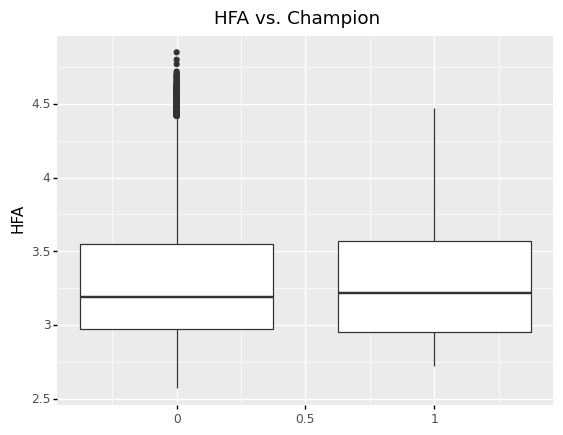

<ggplot: (8755503912177)>


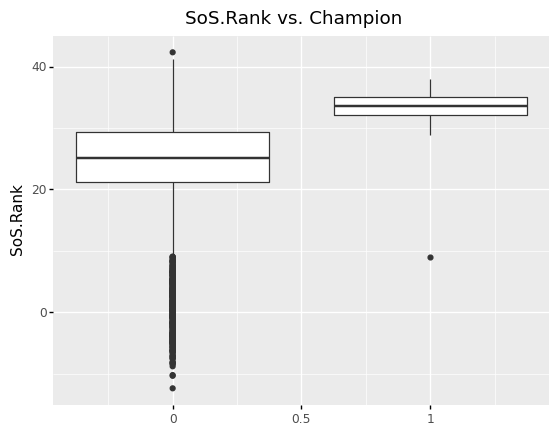

<ggplot: (8755503144771)>


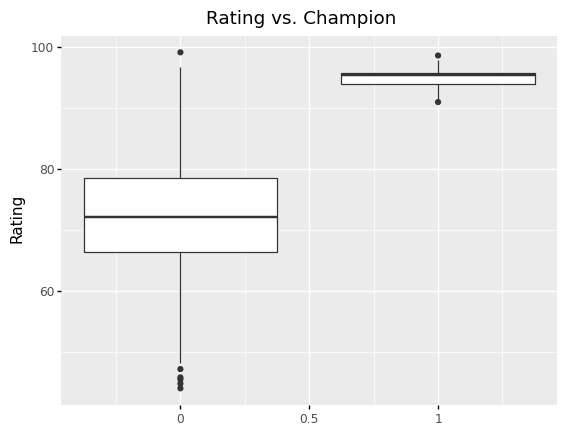

<ggplot: (8755504308309)>


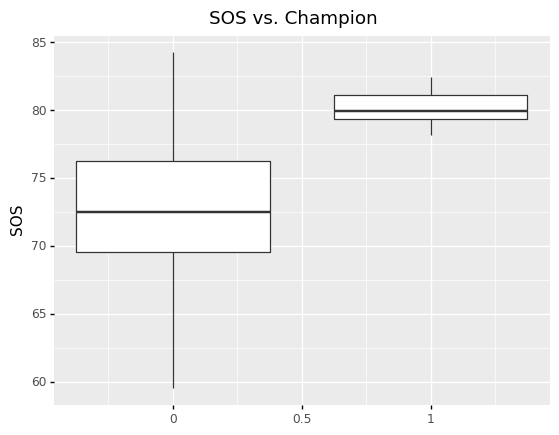

<ggplot: (8755478891072)>


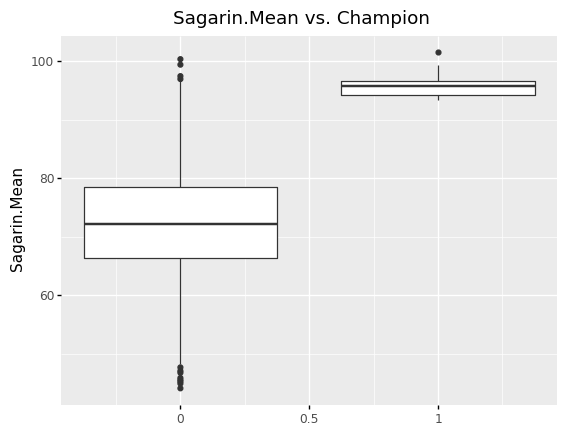

<ggplot: (8755504044957)>


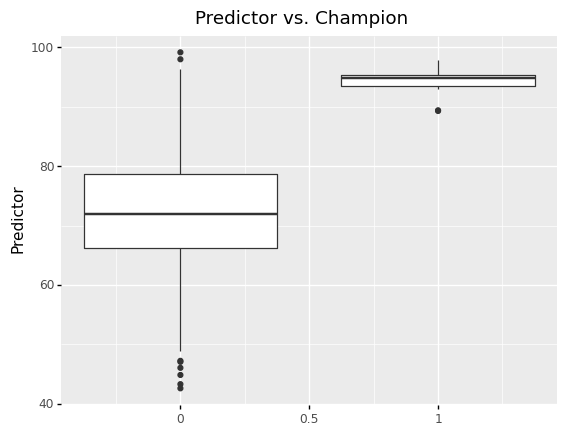

<ggplot: (8755503277773)>


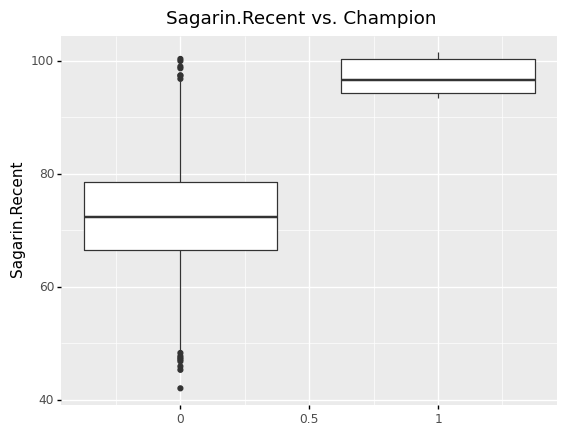

<ggplot: (8755503132139)>


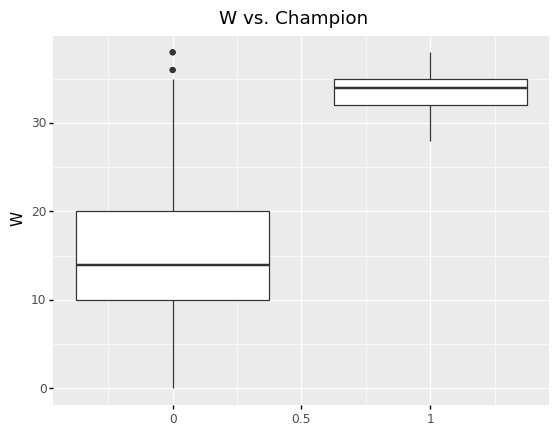

<ggplot: (8755495958233)>


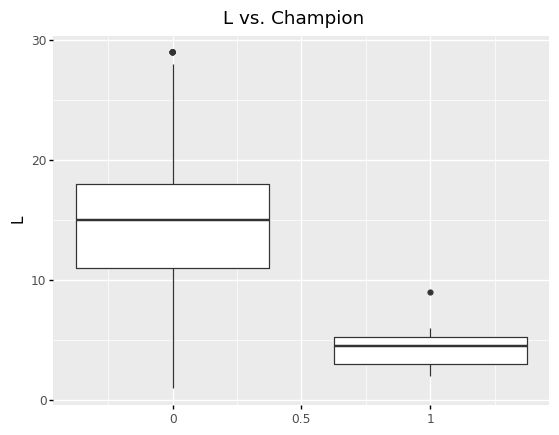

<ggplot: (8755496688869)>


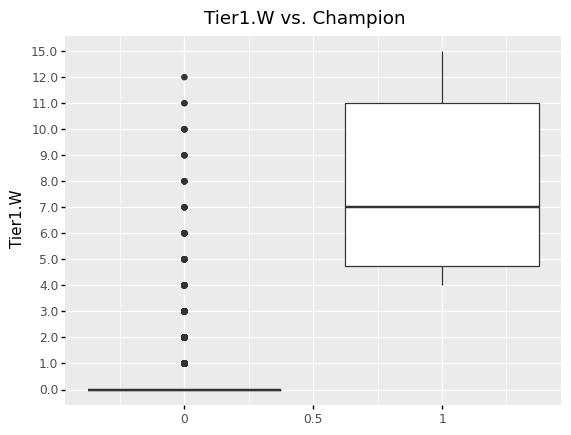

<ggplot: (8755496308381)>


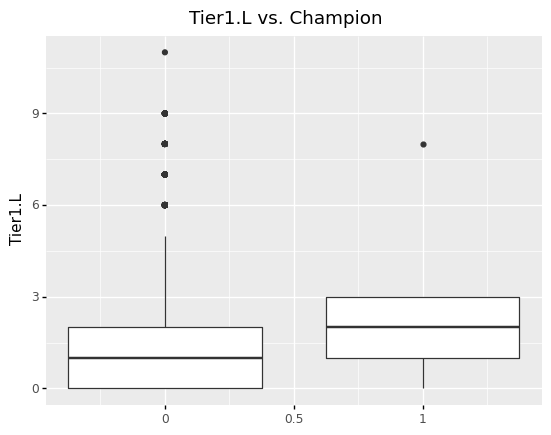

<ggplot: (8755496308306)>


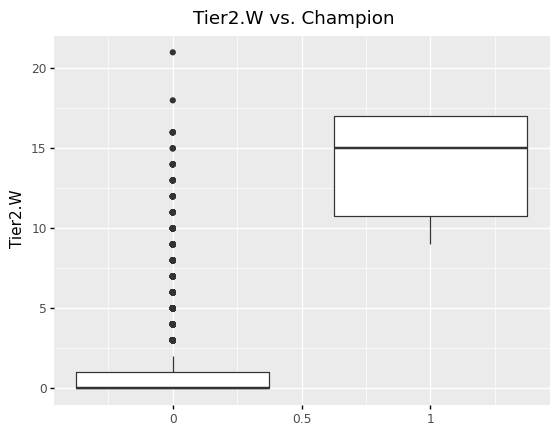

<ggplot: (8755496641660)>


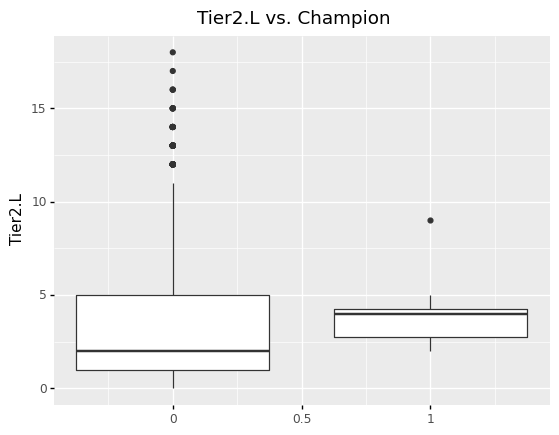

<ggplot: (8755495966826)>


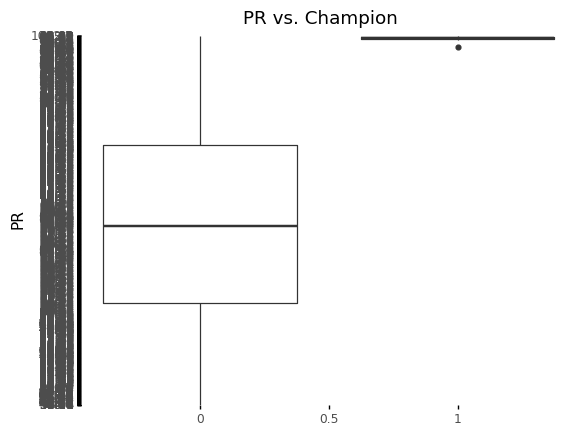

<ggplot: (8755478870396)>


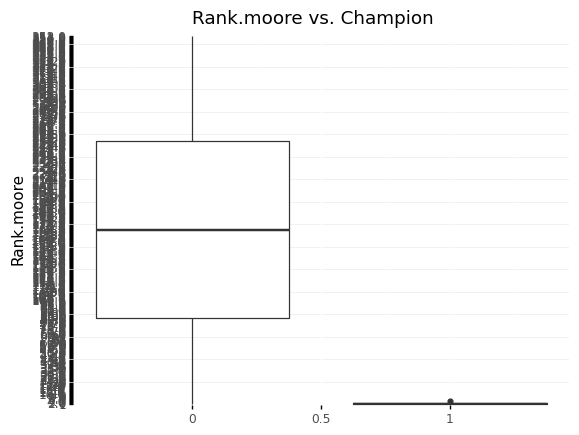

<ggplot: (8755503280541)>


In [18]:
#targets = ["Round.of.32", "Round.of.16", "Round.of.8", "Round.of.4", "Championship", "Champion"]
targets = ["Champion"]
predictors = ["Tempo", "AdjTempo", "OE", "AdjOE", "DE", "AdjDE", "AdjEM",
       "Win.Pct", "Rat.Rank", "Pwr.Rank", "Off.Rank", "Def.Rank", "HFA", "SoS.Rank",
       "Rating", "SOS", "Sagarin.Mean", "Predictor", "Sagarin.Recent",
       "W", "L", "Tier1.W", "Tier1.L", "Tier2.W", "Tier2.L",
       "PR", "Rank.moore"]

for target in targets:
    for var in predictors:
        plt = (ggplot(data=train)
                + geom_boxplot(aes(group=target, y=var, x=target))
                + labs(y = var,
                      title = f"{var} vs. {target}")
                + theme(axis_title_x = element_blank())
              )

        print(plt)

In [19]:
random.seed(123)
X = train[["Tempo", "AdjTempo", "OE", "AdjOE", "DE", "AdjDE", "AdjEM",
       "Win.Pct", "Rat.Rank", "Pwr.Rank", "Off.Rank", "Def.Rank", "HFA", "SoS.Rank",
       "Rating", "SOS", "Sagarin.Mean", "Predictor", "Sagarin.Recent",
       "W", "L", "Tier1.W", "Tier1.L", "Tier2.W", "Tier2.L",
       "PR", "Rank.moore"]]
y = train[['Champion']]

random.seed(123)
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=22),
           k_features=6,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)
random.seed(123)
fselector = forward_feature_selector.fit(X,y)
fselector.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   14.2s finished

[2022-12-06 19:54:34] Features: 1/6 -- score: 0.9551871906160021[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_valida

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   12.6s finished

[2022-12-06 19:54:46] Features: 2/6 -- score: 0.9974831786962122[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_valida

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/site-packages/sklearn/m

('DE', 'AdjDE', 'AdjEM', 'Sagarin.Recent', 'Tier2.W', 'PR')

In [20]:
s = list(fselector.k_feature_names_)
X = train[s]
y = train['Champion']

y_test = test['Champion']
X_test = test[s]

y_hold = holdout['Champion']
X_hold = holdout[s]

In [21]:
random.seed(123)
model = LogisticRegression(solver='liblinear', random_state=0)
random.seed(123)
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
random.seed(123)
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
logit_r2 = model.score(X_test, y_test)
logit_r2

0.9966258962463096

In [23]:
random.seed(123)
ns = cross_val_score(model, X, y, scoring='accuracy', cv=4, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(ns), std(ns)))

Mean Accuracy: 0.996 (0.001)


In [24]:
random.seed(123)
y_pred_logit = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logit))

Accuracy: 0.9966258962463096


In [25]:
np.sum(y_pred_logit)

3.0

In [26]:
random.seed(123)
holdout_logit = model.predict(X_hold)
np.sum(holdout_logit)

1.0

In [27]:
random.seed(123)
clf = DecisionTreeClassifier(random_state=0)

random.seed(123)
clf = clf.fit(X,y)
dt_r2 = clf.score(X_test, y_test)

y_pred_clf = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))

Accuracy: 0.9974694221847322


In [28]:
dt_r2

0.9974694221847322

In [29]:
np.sum(y_pred_clf)

7.0

In [30]:
random.seed(123)
holdout_clf = clf.predict(X_hold)
np.sum(holdout_clf)

2.0

In [31]:
random.seed(123)
sc = StandardScaler()
random.seed(123)
classifier = GaussianNB()
random.seed(123)
classifier.fit(X, y)
nb_r2 = classifier.score(X, y)
random.seed(123)
y_pred_nb  =  classifier.predict(X_test)
np.sum(y_pred_nb)

59.0

In [32]:
cm = confusion_matrix(y_test, y_pred_nb)
ac = accuracy_score(y_test,y_pred_nb)
cm

array([[2312,   52],
       [   0,    7]])

In [33]:
ac

0.9780683256010122

In [34]:
nb_r2

0.9746549560853199

In [35]:
random.seed(123)
holdout_nb = classifier.predict(X_hold)
np.sum(holdout_nb)

10.0

In [36]:
random.seed(123)
boost_model = GradientBoostingClassifier(random_state=0)
random.seed(123)
boost_model.fit(X, y)
boost_r2 = boost_model.score(X_test, y_test)
# evaluate the model on the dataset
random.seed(123)
n_scores = cross_val_score(boost_model, X, y, scoring='accuracy', cv=4, n_jobs=-1)

In [37]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.997 (0.001)


In [38]:
boost_r2

0.9953606073386757

In [39]:
random.seed(123)
y_pred_boost = boost_model.predict(X_test)
np.sum(y_pred_boost)

10.0

In [40]:
random.seed(123)
holdout_boost = boost_model.predict(X_hold)
np.sum(holdout_boost)

2.0

In [41]:
logit_df = holdout
logit_df['pred'] = holdout_logit
logit_df['TeamName'].loc[logit_df['pred']==1.0]

6676    VILLANOVA
Name: TeamName, dtype: object

In [42]:
dt_df = holdout
dt_df['pred'] = holdout_clf
dt_df['TeamName'].loc[dt_df['pred']==1.0]

6487       KANSAS
6676    VILLANOVA
Name: TeamName, dtype: object

In [43]:
nb_df = holdout
nb_df['pred'] = holdout_nb
nb_df['TeamName'].loc[nb_df['pred']==1.0]

6366       ARIZONA
6368      ARKANSAS
6375        BAYLOR
6429          DUKE
6457       GONZAGA
6468       HOUSTON
6487        KANSAS
6639     TENNESSEE
6648    TEXAS TECH
6676     VILLANOVA
Name: TeamName, dtype: object

In [44]:
boost_df = holdout
boost_df['pred'] = holdout_boost
boost_df['TeamName'].loc[boost_df['pred']==1.0]

6487       KANSAS
6676    VILLANOVA
Name: TeamName, dtype: object